In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

In [3]:
#Code nabbed from: http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

# Experiment 4

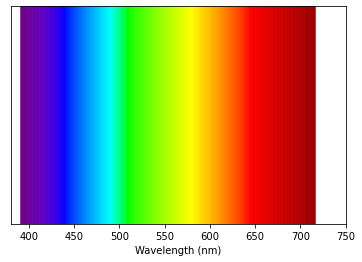

In [11]:
screenLoc = 13
spc = 5000

gratingLoc = np.array([38,53,68])
center = np.array([[[4.95,4.9], [9.65,9.5]],
                  [[8.2,7.9],[15.0,15.5]],
                  [[11.1,11.0],[21.5,21.0]]]) #(cm)

WL = []
for i in range(len(center)):
    temp = []
    for j in range(len(center[i])):
        angle = np.rad2deg(np.arctan(center[i][j].mean() / (gratingLoc[i] - screenLoc)))
        wavelength = np.sin(np.deg2rad(angle)) / spc *1e7
        temp.append(wavelength)
    WL.append(temp)
WL = np.array(WL)


lightBulb = np.array([WL[:,0].mean(), WL[:,1].mean()])
lightBulb
band = np.linspace(lightBulb[0],lightBulb[1],500)
colors = []
for i in band:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=band, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
#ax.set_title('Visible Spectrum'.format(int(k+1)))
ax.set_yticks([]);

In [29]:
uncs = []
for i in range(len(center)):
    temp = []
    for j in range(len(center[i])):
        unc = abs((center[i][j][0]-center[i][j][1])/2)+0.05
        temp.append(unc)
    uncs.append(temp)


[419.7401 429.9233 475.4031 492.7399 519.5539 544.9988 588.5165 605.1716]


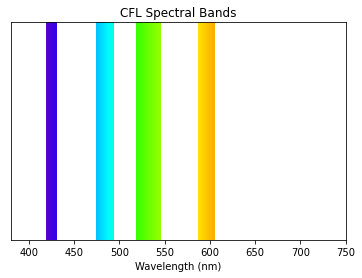

In [53]:
screenLoc = 13.5
spc = 5000

WL = np.array([419.7401,429.9233,475.4031,492.7399,519.5539,544.9988,588.5165,605.1716])
print(WL)

band1 = np.linspace(WL[0],WL[1],500)
band2 = np.linspace(WL[2],WL[3],500)
band3 = np.linspace(WL[4],WL[5],500)
band4 = np.linspace(WL[6],WL[7],500)

colors = []
for i in band1:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255

colorBandOne = []
for i in band2:
    colorBandOne.append(wavelength_to_rgb(i))
colorBandOne = np.array(colorBandOne) / 255
    
colorBandTwo = []
for i in band3:
    colorBandTwo.append(wavelength_to_rgb(i))
colorBandTwo = np.array(colorBandTwo) / 255

colorBandFour = []
for i in band4:
    colorBandFour.append(wavelength_to_rgb(i))
colorBandFour = np.array(colorBandFour) / 255



fig, ax = plt.subplots() 
ax.vlines(x=band1, ymin = 0, ymax=1, colors=colors)
ax.vlines(x=band2, ymin = 0, ymax=1, colors=colorBandOne)
ax.vlines(x=band3, ymin = 0, ymax=1, colors=colorBandTwo)
ax.vlines(x=band4, ymin = 0, ymax=1, colors=colorBandFour)

ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('CFL Spectral Bands')
ax.set_yticks([]);

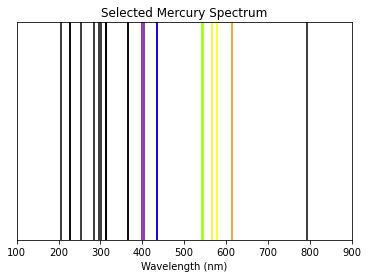

In [7]:

Merc = 0.1*np.array([2052.828,2260.294,2262.223,2536.517,2847.675,2967.28,3021.498,3125.668,3131.548,3131.839,3650.153,3654.836,3983.931,4046.563,4339.223,4347.494,4358.328,5425.253,5460.735,5677.105,5790.663,6149.475,7944.555,10139.76])
colors = []
for i in Merc:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=Merc, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(100,900)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Selected Mercury Spectrum')
ax.set_yticks([]);
